In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
mall=pd.read_csv('Mall_Customers.csv')

In [3]:
mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
mall.shape

(200, 5)

In [5]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
mall.Genre=le.fit_transform(mall['Genre'])

In [9]:
x=mall.drop('CustomerID',axis=1)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
x_sc=sc.fit_transform(x)

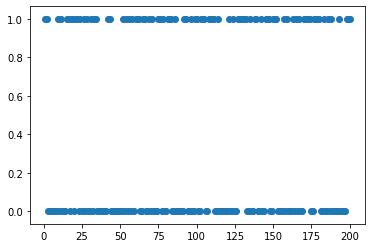

In [13]:
plt.scatter(mall.iloc[:,0],mall.iloc[:,1])

In [16]:
from sklearn.cluster import KMeans
cluster_id=[]
for i in range(1,7):
    km=KMeans(i).fit(x_sc)
    y=km.fit_predict(x_sc)
    cluster_id.append(km.inertia_)
cluster_id

[800.0,
 588.8026767824936,
 484.8120859033446,
 388.65179447444933,
 325.68279040738923,
 275.9799861929047]

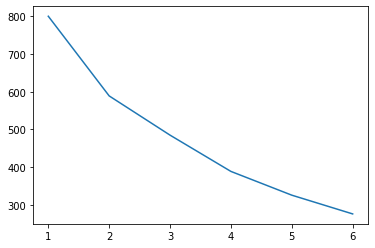

In [18]:
plt.plot(list(range(1,7)),cluster_id)

In [41]:
kmean=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_means=kmean.fit_predict(x_sc)
y_means

array([0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0])

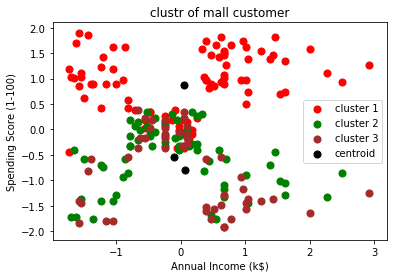

In [42]:
# 0 and 1 are 2 columns, (y_means)0,1,2 are clusters 
plt.scatter(x_sc[y_means==0,2],x_sc[y_means==0,3],s=50,c='red',label='cluster 1')
plt.scatter(x_sc[y_means==1,2],x_sc[y_means==1,3],s=50,c='green',label='cluster 2')
plt.scatter(x_sc[y_means==2,2],x_sc[y_means==2,3],s=50,c='brown',label='cluster 3')
#plt.scatter(x_sc[y_means==3,2],x_sc[y_means==3,3],s=50,c='purple',label='cluster 3')
plt.scatter(kmean.cluster_centers_[:,2],kmean.cluster_centers_[:,3],s=50,c='black',label='centroid')
plt.title('clustr of mall customer')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()